 ## Análise de dados do Spotify e Youtube

# Integrantes: 

- Daniele Laís Reis da Silva
- Geovanna Sandy Guedes de Medeiros
- Matheus Bruno da Silva Oliveira

# Introdução

Plataformas de Streaming como o Spotify e o Youtube têm desempenhado um papel central na forma como consumimos música e vídeos. O Spotify, como um dos principais serviçoes de streaming de músicas, oferece uma vasta biblioteca de faixas que permite aos usuários acessar conteúdos de artistas de todo o mundo. Já o Youtube, mais comum para compartilhamento de vídeos é um espaço onde tanto artistas profissionais quanto criadores independentes de conteúdo podem alcançar e fazer com que usuários possam ter acesso a esses conteúdos visando muitas visualizações. A análise dos dados dessas plataformas oferece insights valiosos como o comportamento dos consumidores, as tendências musicais e de vídeo, e o impacto que essas plataformas têm na indústria do entretenimento. Através da coleta de dados, como o número de reproduções, curtidas, views, tempo, musicalidade etc, é possível compreender padrões de popularidade e a sua influência em variações de contextos. 

#### **Objetivo geral**

- Apresentar e analiar os dados do Spotify e Youtube de forma a explorar várias formas da música utilizando variáveis como: Danceability, tempo(BPM), acousticness, instrumentalness, liveness, valence, views, likes e os demais apresentados ao decorrer do projeto para que ao final da análise exploratória, possamos obter informações coerentes, possíveis novidades e perguntas respondidas. 

#### **Objetivos específicos**

- Analisar de que forma a duração de uma música está relacionada com o número de streams que ela recebeu;
- Descobrir se no geral, singles fazem mais sucesso do que álbuns;
- Identificar quais valores de Acousticness, Speechiness e Liveness mais aparecem e o que eles podem representar;
- Compreender se o fato de uma música ser considerada dançável tem ligação com o seu BPM;
- Buscar outliers na coluna Energy e investigá-los;
- Explicar se existe uma correlação entre o Speechiness e o Instrumentalness? Se sim, de que maneira ela se comporta;
- Analisar a itensidade de uma música está, de alguma forma, relacionada com a sua energia;
- Identificar agrupamentos de uma distribuição baseada nas colunas Loudness e Energy;
- Entender qual a correlação entre a "dançabilidade" de uma música e a sua valência;
- Analisar grupos que se destacam ao organizar os dados de acordo com suas Views e Likes no Youtube.

### Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Dados Manuseados



Foi criado um Dataframe para o dataset escolhido para que os dados possam ser melhor visualizados.

In [3]:
df_spotify_youtube = pd.read_csv("../Projeto_ICD-Analise_de_Dados_do_Spotify_e_Youtube/Spotify_Youtube.csv")

### Sobre o conjunto de dados
Para cada conjunto de dados de músicas de vários artistas, para cada música está presente várias estatísticas da versão musical no Spotify, incluindo o número de reproduções, e o número de visualizações do videoclipe oficial da música no youtube.

### Descrição
Os dados inclui 26 variáveis ​​para cada uma das músicas coletadas do Spotify. Sendo eles:

**Track** : nome da música, conforme visível na plataforma Spotify.

**Artist** : nome do artista.

**Url_spotify** : a URL do artista.

**Album** : o álbum em que a música está contida no Spotify.

**Album_type** : indica se a música foi lançada no Spotify como single ou contida em um álbum.

**Uri** : um link do Spotify usado para encontrar a música por meio da API.

**Danceability** : descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançante e 1,0 é mais dançante.

**Energy** : é uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Normalmente, faixas energéticas parecem rápidas, altas e barulhentas. 

**Key** : a chave em que a faixa está. Os inteiros são mapeados para notas usando a notação Pitch Class padrão. 

**Loudness**: A intensidade é a qualidade de um som que é o principal correlato psicológico da força física (amplitude). Os valores geralmente variam entre -60 e 0 db.

**Speechiness** : detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. 

**Acousticness** : uma medida de confiança de 0,0 a 1,0 para determinar se a faixa é acústica. 1,0 representa alta confiança de que a faixa é acústica.

**Instrumentalness** : prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 devem representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

**Liveness** : detecta a presença de uma audiência na gravação. Valores mais altos de liveness representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa seja ao vivo.

**Valence** : uma medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, felizes, alegres, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, tristes, deprimidas, raivosas).

**Tempo** : o tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou o ritmo de uma determinada peça e deriva diretamente da duração média da batida.

**Duration_ms** : a duração da faixa em milissegundos.

**Stream** : número de reproduções da música no Spotify.

**Url_youtube** : url do vídeo vinculado à música no Youtube, se houver.

**Title** : título do videoclipe no youtube.

**Channel** : nome do canal que publicou o vídeo.

**Views** : número de visualizações.

**Likes** : número de curtidas.

**Comments** : número de comentários.

**Description** : descrição do vídeo no Youtube.

**Licensed** : indica se o vídeo representa conteúdo licenciado, o que significa que o conteúdo foi carregado em um canal vinculado a um parceiro de conteúdo do YouTube e depois reivindicado por esse parceiro.

**official_video** : valor booleano que indica se o vídeo encontrado é o vídeo oficial da música.

Como o Dataframe possui uma variedade de dados numéricos e categóricos, foi optado por separar esses determinados dados pois os mesmos têm características e comportamentos distintos, exigindo abordagens diferentes para sua análise e modelagem.

**Numéricos e/ou não categóricos**

In [4]:
numeric_columns = ['Danceability','Energy','Key','Loudness','Speechiness', 'Acousticness', 'Instrumentalness','Liveness','Valence','Tempo','Duration_ms', 'Views', 'Likes', 'Comments','Stream']
df_spotify_youtube_num = df_spotify_youtube[numeric_columns]
df_spotify_youtube_num

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06


**Categóricos**

In [5]:
not_numeric_columns = ['Artist', 'Url_spotify','Track','Album','Album_type','Uri','Url_youtube','Title','Channel', 'Description','Licensed','official_video']
df_spotify_youtube_ctg = df_spotify_youtube[not_numeric_columns]
df_spotify_youtube_ctg

,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,Licensed,official_video
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,Official HD Video for Gorillaz' fantastic trac...,True,True
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,The official video for Gorillaz - Rhinestone E...,True,True
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,The official music video for Gorillaz - Clint ...,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True


## Exploração Inicial

Para exploração inicial dos dados, todas as medidas de centralidade (média, moda e mediana) e dispersão (variância e desvio padrão) foram aplicadas às colunas do nosso DataFrame

### Medidas de Centralidade - Dados Numéricos


- Média

In [ ]:
df_spotify_youtube_num.mean()

Danceability        6.197775e-01
Energy              6.352503e-01
Key                 5.300348e+00
Loudness           -7.671680e+00
Speechiness         9.645601e-02
Acousticness        2.915353e-01
Instrumentalness    5.596156e-02
Liveness            1.935210e-01
Valence             5.298533e-01
Tempo               1.206383e+02
Duration_ms         2.247176e+05
Views               9.393782e+07
Likes               6.633411e+05
Comments            2.751899e+04
Stream              1.359422e+08
dtype: float64

- Mediana

In [ ]:
df_spotify_youtube_num.median()

Danceability        6.370000e-01
Energy              6.660000e-01
Key                 5.000000e+00
Loudness           -6.536500e+00
Speechiness         5.050000e-02
Acousticness        1.930000e-01
Instrumentalness    2.410000e-06
Liveness            1.250000e-01
Valence             5.370000e-01
Tempo               1.199655e+02
Duration_ms         2.132910e+05
Views               1.572401e+07
Likes               1.354555e+05
Comments            3.571500e+03
Stream              5.275420e+07
dtype: float64

- Moda

In [48]:
df_spotify_youtube_num.mode()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.687,0.572,0.0,-7.818,0.0324,0.114,0.0,0.11,0.961,77.986,237467.0,9.393782e+07,663341.061307,27518.993697,1.359422e+08


### Medidas de Dispersão - Dados Numéricos

- Variância

In [ ]:
df_spotify_youtube_num.var()

Danceability        2.731233e-02
Energy              4.585444e-02
Key                 1.278975e+01
Loudness            2.146029e+01
Speechiness         1.253384e-02
Acousticness        8.195910e-02
Instrumentalness    3.734661e-02
Liveness            2.839992e-02
Valence             6.023538e-02
Tempo               8.748338e+02
Duration_ms         1.557118e+10
Views               7.371826e+16
Likes               3.118073e+12
Comments            3.631410e+10
Stream              5.794338e+16
dtype: float64

- Desvio padrão

In [ ]:
df_spotify_youtube_num.std()

Danceability        1.652644e-01
Energy              2.141365e-01
Key                 3.576276e+00
Loudness            4.632525e+00
Speechiness         1.119546e-01
Acousticness        2.862850e-01
Instrumentalness    1.932527e-01
Liveness            1.685228e-01
Valence             2.454290e-01
Tempo               2.957759e+01
Duration_ms         1.247845e+05
Views               2.715111e+08
Likes               1.765807e+06
Comments            1.905626e+05
Stream              2.407143e+08
dtype: float64

### Medidas de Centralidade - Dados Categóricos

- Moda

In [ ]:
df_spotify_youtube_ctg.mode()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,Licensed,official_video
0,$NOT,https://open.spotify.com/artist/003f4bk13c6Q3g...,El Ultimo Adiós - Varios Artistas Version,Greatest Hits,album,spotify:track:0tzixmHNQfE6S6SirSToxW,https://www.youtube.com/watch?v=GqOvxbFLwjY,Color Esperanza 2020 - Various Artists (Offici...,T-Series,,True,True
1,$uicideboy$,https://open.spotify.com/artist/00FQb4jTyendYW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(G)I-DLE,https://open.spotify.com/artist/00XhexlJEXQstH...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,*NSYNC,https://open.spotify.com/artist/00me4Ke1LsvMxt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,070 Shake,https://open.spotify.com/artist/00sCATpEvwH48a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,will.i.am,https://open.spotify.com/artist/7y97mc3bZRFXzT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2045,Ángela Aguilar,https://open.spotify.com/artist/7yQrcdkLdBAkV7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2046,Ñejo,https://open.spotify.com/artist/7ygNQCdpQWW7iS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047,Ñengo Flow,https://open.spotify.com/artist/7z5WFjZAIYejWy...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Como os dados apresentados são categóricos, calculamos apenas o valor da moda porque é a medida de tendência central que identifica o valor mais frequente em um conjunto de dados, o que faz sentido em categorias qualitativas.

# Pré-Processamento


Como o dataset escolhido estava bem organizado e com poucas informações vazias, o pré-processamento dos dados se resumiu a preencher os poucos dados que estavam vazios com a média dos valores da coluna de onde o dado pertencia.

In [37]:
df_spotify_youtube_num.isnull()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20714,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
20716,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
df_spotify_youtube_num.dropna()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06


Note que, ao excluírmos as linhas que apresentam valores nulos do nosso DataFrame, passamos de 20718 linhas para 19549 linhas, o que significa que 1169 linhas apresentavam algum valor nulo, esse valor representa 5,64% das linhas do nosso DataFrame, por esse motivo, o grupo optou por preencher os valores faltantes com a média de sua respectiva coluna

In [46]:
df_spotify_youtube_num = df_spotify_youtube_num.fillna(df_spotify_youtube_num.mean())
df_spotify_youtube = df_spotify_youtube.fillna(df_spotify_youtube_num.mean())

# Perguntas

Do início ao fim do Projeto, diversas perguntas surgiram relacionadas aos dados que estavam sendo manuseados e explorados, neste tópico, portanto, iremos exibí-las e demonstrar os caminhos que utilizamos para responder à esses questionamentos.

### 1 - De que forma a duração de uma música está relacionada com o número de streams que ela recebeu?

Para responder essa pergunta, é necessário analisarmos o gráfico de dispersão das colunas "Duration_ms" e "Stream" juntamente com a sua matriz-correlação

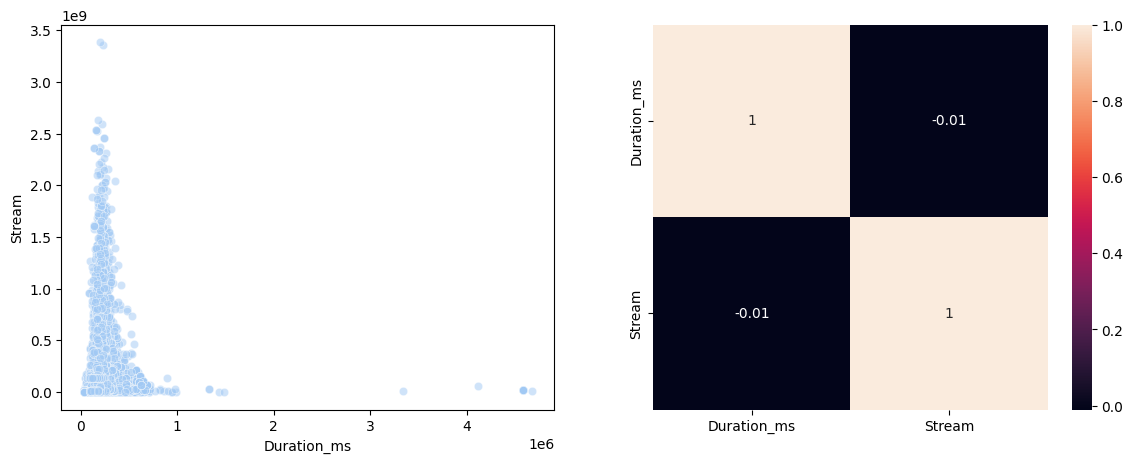

In [11]:
sns.set_palette('pastel')
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,y='Stream',x='Duration_ms',alpha=0.5)

correlacao_matriz_a = df_spotify_youtube[['Duration_ms','Stream']].corr()

plt.subplot(1,2,2)
sns.heatmap(correlacao_matriz_a, annot=True,)

plt.show()

Pode-se perceber, através da análise do gráfico, que não existe uma correlação forte entre as duas colunas, os valores da coluna Duration_ms estão concentrados entre 0 e 1, entretanto, os valores da coluna Stream estão bem dispersos em relação ao eixo-Y. Esta ausência de correlação fica ainda mais explícita quando analisamos a matriz-correlação, onde nos é proporcionado o valor de **-0.01**, implicando que **não existe uma relação entra a duração de uma música com a sua quantidade de streams**, tendo em vista que é um valor muito proximo do 0.

### 2 - No geral, singles fazem mais sucesso do que álbuns?

Para responder a essa pergunta, é necessário somar a quantidade de streams que músicas do tipo album receberam e comparar esta soma com quantidade de streams que músicas do tipo single receberam, esta comparação pode ser feita matematicamente e graficamente 

In [9]:
df_album = df_spotify_youtube[df_spotify_youtube['Album_type'] == 'album']
soma_streams_album = df_album['Stream'].sum()

df_single = df_spotify_youtube[df_spotify_youtube['Album_type'] == 'single']
soma_streams_single = df_single['Stream'].sum()

soma_streams_album > soma_streams_single

np.True_

Text(0, 0.5, 'Stream')

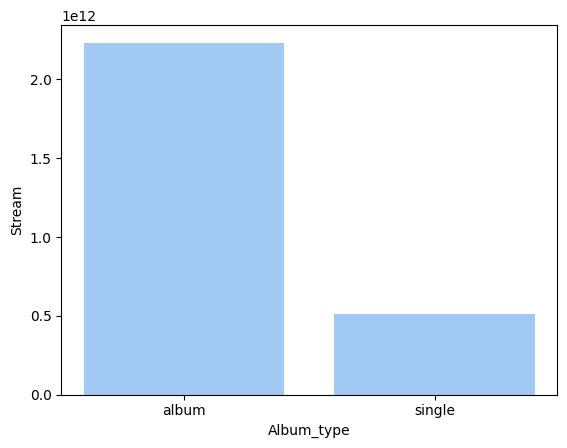

In [12]:
labels = ['album', 'single']
valores = [soma_streams_album, soma_streams_single]

plt.bar(labels, valores)

plt.xlabel('Album_type')
plt.ylabel('Stream')

Através da análise gráfica, podemos perceber que **albuns recebem muito mais streams que singles**, isso é facilmente explicado pelo simples fato de que albuns são conjuntos de músicas, incluindo os próprios singles, portanto, **albuns sempre terão uma quantidade de streams maior que singles desde que os singles estejam inclusos no álbum**.

### 3 - Quais valores de **Acousticness**, **Speechiness** e **Liveness** mais aparecem? O que eles representam?

Para responder a essa pergunta, precisamos construir um gráfico de frequência (histograma) e observar quais valores mais se repete entre cada uma das colunas citadas, após isso, é necessário analisar o que esses valores significam para uma música. Como ferramenta auxiliar, podemos construir também os gráficos boxplot das respectivas colunas. 

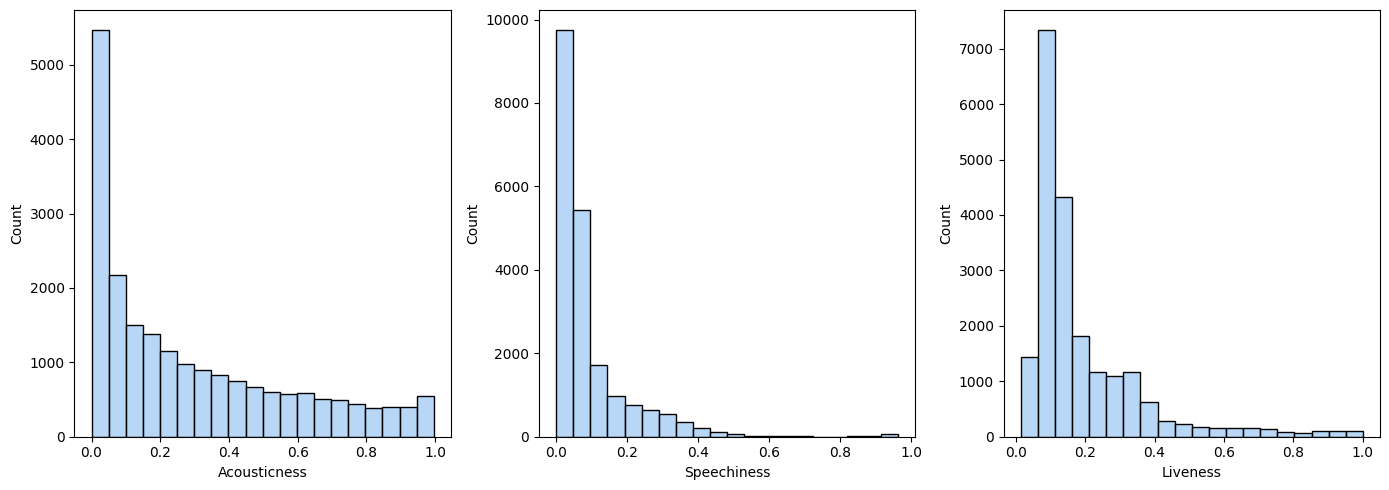

In [13]:
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.histplot(data=df_spotify_youtube,x="Acousticness",bins=20)

plt.subplot(1,3,2)
sns.histplot(data=df_spotify_youtube,x="Speechiness",bins=20)

plt.subplot(1,3,3)
sns.histplot(data=df_spotify_youtube,x="Liveness",bins=20)

plt.tight_layout()

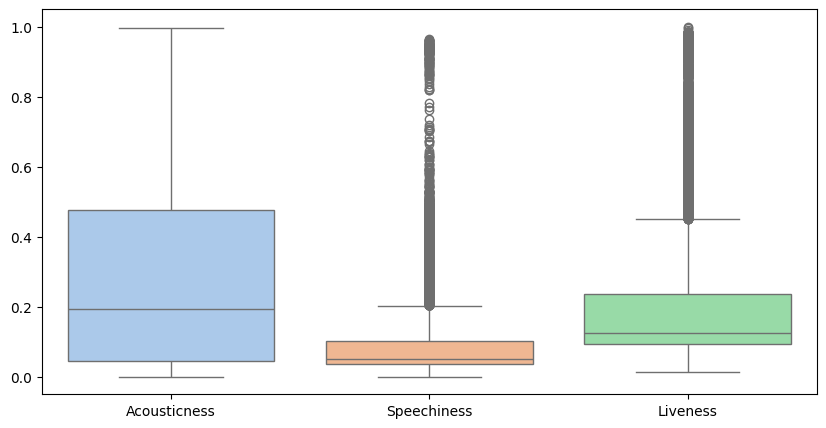

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(data= df_spotify_youtube_num[['Acousticness','Speechiness','Liveness']])
plt.show()

Por meio da análise dos gráficos, pode-se concluir que tanto as colunas Acousticness e Speechiness tem valores que se repetem com mais frequência na faixa de 0.0 a 0.05, já a coluna Liveness tem valores que se repetem com mais frequência na faixa de 0.05 a 0.1. No geral, **os valores das três colunas se repetem com mais frequência entre 0.0 a 0.2**, o que significa que **há uma concentração maior de músicas não acústicas, que apresentam poucos elementos de fala** (como palavras recitadas/faladas ao invés de cantadas) **e que não são gravadas com a presença de uma plateia e/ou peformadas ao vivo**.

### 4 - A amplitude de uma música está, de alguma forma, relacionada com a sua energia?

Para responder essa pergunta, é necessário analisarmos o gráfico de dispersão das colunas "Loudness" e "Energy" juntamente com a sua matriz-correlação

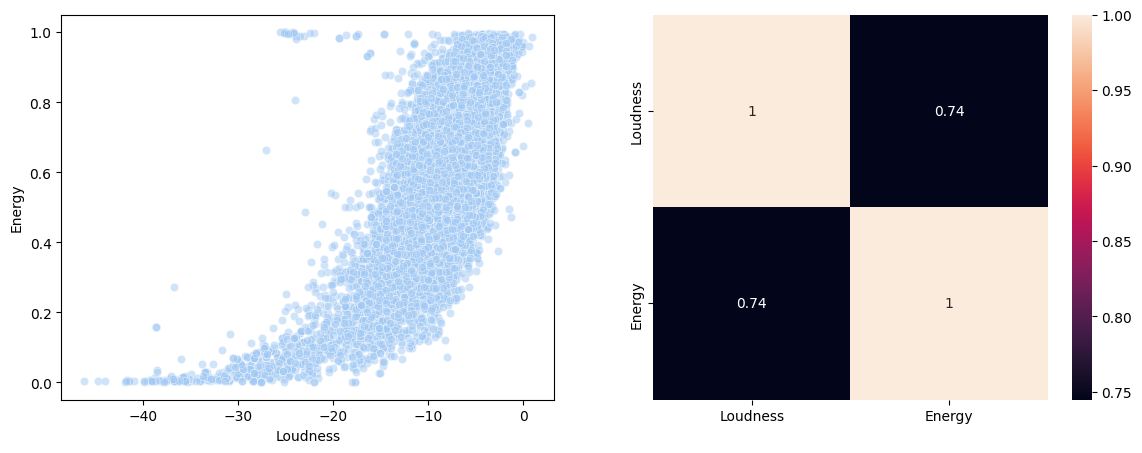

In [18]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,x='Loudness',y='Energy',alpha=0.5)

correlacao_matriz_x = df_spotify_youtube[['Loudness','Energy']].corr()

plt.subplot(1,2,2)
sns.heatmap(correlacao_matriz_x, annot=True,)

plt.show()

Pode-se perceber, através da análise do gráfico, que existe uma forte correlação entre as duas colunas. De acordo que os valores da coluna Loudness crescem, os valores da coluna Energy também aumentam, o que está representado, no gráfico, por uma curva crescente da esquerda para a direita. Esta correlação fica evidente quando analisamos a matriz-correlação, onde nos é proporcionado o valor de **0.74**, implicando que **existe uma relação entra a amplitude de uma música com a sua intensidade/energia**, tendo em vista que é um valor muito proximo de 1.

### 5- A coluna **Energy** possui outliers? Se sim, o que podemos dizer sobre eles? Possuem alguma semelhança?

Para responder a essa pergunta, é necessário construir o boxplot da coluna Energy e identificar se existem outliers, observando a faixa de valores que os mesmos se encontram, para assim analisá-los

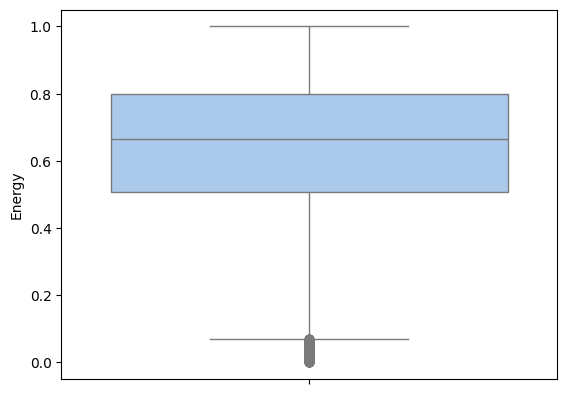

In [19]:
sns.boxplot(data= df_spotify_youtube['Energy'])
plt.show()

In [85]:
quartil_um = df_spotify_youtube['Energy'].quantile(0.25)
quartil_tres = df_spotify_youtube['Energy'].quantile(0.75)
intervalo_int_quartil = quartil_tres - quartil_um
limite_inferior = quartil_um - 1.5 * intervalo_int_quartil

outliers = df_spotify_youtube[df_spotify_youtube['Energy'] <= limite_inferior]

A partir da análise do gráfico, podemos perceber que **existem 364 outliers na coluna Energy**, além disso, pode-se dizer que **todos possuem valores muito baixos de intensidade/energia** e se caracterizam por:

- Sons para dormir, como **barulhos de chuva**, **sons de trafego em cidades grandes**, **barulhos de ondas do mar** e **sons de floresta**
- Músicas para **meditação/relaxar**
- Músicas **instrumentais**, sendo elas **clássicas/orquestrais/sinfônicas** e/ou que fazem parte da **soundtrack de jogos e filmes**

### 6 - Existe um agrupamento se oganizarmos os dados de acordo com o seu **Loudness** e a sua **Energy**? De que forma esse agrupamento está distribuído?

Para responder a essa pergunta, precisamos aplicar o K-means ao gráfico de dispersão das colunas Loudness e Energy e identificar características e semelhanças entre os membros dos grupos formados

<Axes: xlabel='Loudness', ylabel='Energy'>

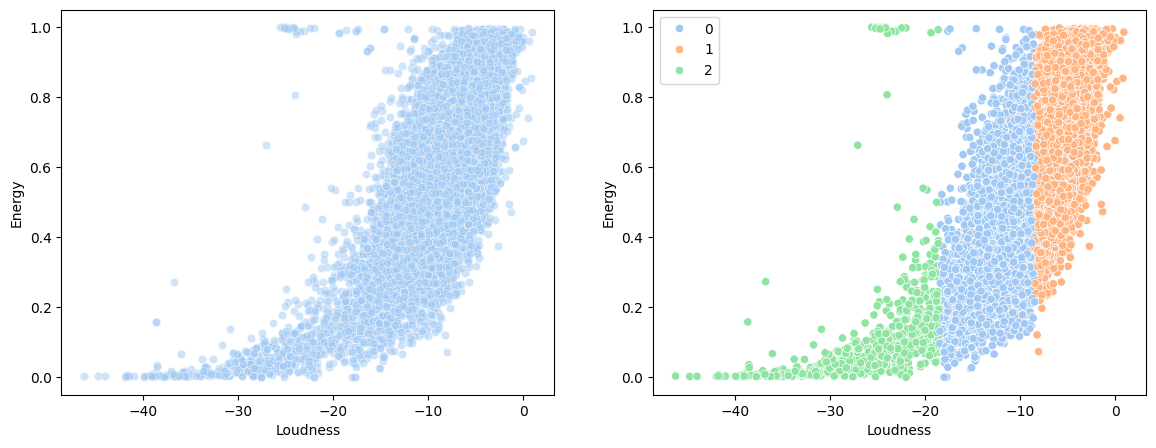

In [20]:
df_loud_energy = df_spotify_youtube[['Loudness','Energy']]
df_loud_energy = df_loud_energy.fillna(df_loud_energy.mean())

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_loud_energy)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,x='Loudness',y='Energy',alpha=0.5)

plt.subplot(1,2,2)
sns.scatterplot(data=df_loud_energy, x='Loudness', y='Energy', hue=kmeans.labels_, palette='pastel')

Sim, **existe um agrupamento ao organizarmos os dados de acordo com o seu Loudness e a sua Energy**. A partir da análise desses grupos formados, pode-se concluir que:
- No **Grupo 2 - Verde** percebe-se uma concentração de **músicas clássicas, sinfônicas** e/ou **orquestrais**, em decorrência da baixa amplitude e intensidade dos elementos musicais que as envolvem, além de artistas voltados ao classicismo, como **Frédéric Chopin**, **Franz Schubert**, **Wolfgang Amadeus Mozart** e **London Symphony Orchestra**.

- No **Grupo 0 - Azul** nota-se um conjunto de músicas com instrumentais mais leves e relacionadas aos gêneros **Jazz**, **Soft Rock**, **Country**,**Rock Pop** e **Alternative Rock** que, em sua maioria, pertencem a artistas da década de 40-90, como por exemplo, **Fleetwood Mac**, **The Beatles**, **Frank Sinatra**, **Elthon John**, **Elvis Presley** e **Red Hot Chili Peppers**.

- No **Grupo 1 - Laranja** é possível identificar a presença de músicas com instrumentais e vocais mais pesados, devido ao uso frequente de sintetizadores e samplers, sendo a sua maior parte músicas do gênero **Rip-Hop**, **Rap**, **Heavy Metal**, **Hard Rock**, **Pop** e **Eletrônica**. Alguns artistas presentes que podem ser citados são: **Gorillaz**, **50 cent**, **Black Eyed Pies**, **AC/DC**, **Linkin Park**, **Daft Punk** e **Shakira**.

### 7 - Ao agruparmos os dados de acordo com as suas **Views** e os seus **Likes**, podemos encontrar algum grupo que se destaque? Que informações podemos extrair desse grupo?

Para responder a essa pergunta, precisamos aplicar o K-means ao gráfico de dispersão das colunas Views e Likes, identificar algum grupo formado que se destaque e observar características e semelhanças entre os membros desse determinado grupo

<Axes: xlabel='Views', ylabel='Likes'>

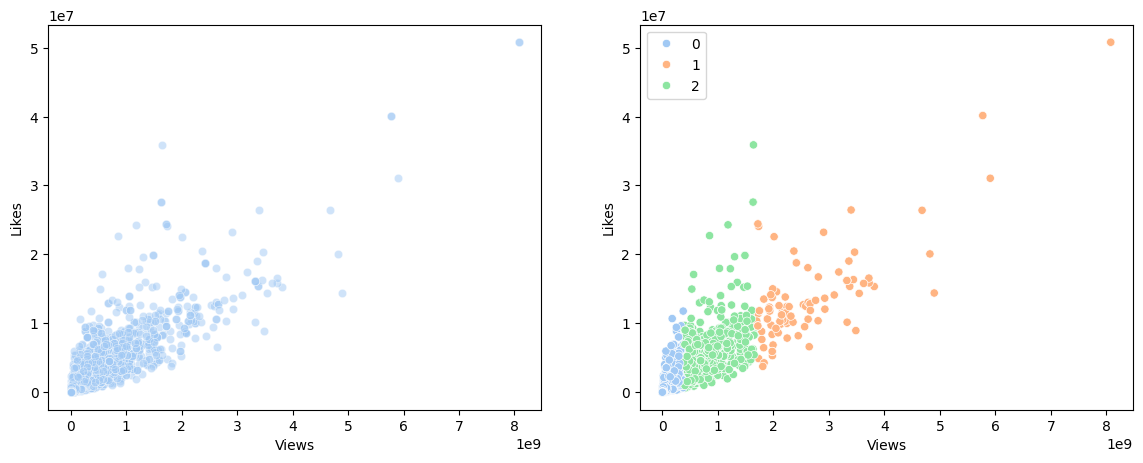

In [21]:
df_views_likes = df_spotify_youtube[['Views','Likes']]
df_views_likes = df_views_likes.fillna(df_views_likes.mean())

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_views_likes)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube,x='Views',y='Likes',alpha=0.5)

plt.subplot(1,2,2)
sns.scatterplot(data=df_views_likes, x='Views', y='Likes', hue=kmeans.labels_, palette='pastel')

Através da análise do gráfico, pode-se perceber que **existe um grupo que se destaca entre os três grupos formados**, sendo ele o **Grupo 1 - Laranja**. Neste grupo formado por 112 membros, encontram-se **músicas que fizeram sucessos estrondosos e viralizaram em todo o mundo**, as quais possuem mais de **1,6 bilhão de visualizações** e, em sua maioria, são do **gênero Pop**, destacando-se algumas músicas infantis como **Wheels on the Bus**, **Baa Baa Black Sheep** e **Baby Shark**.

## Conclusão

### Resultados

De forma geral, pode-se concluir que:

- Albuns fazem mais sucesso do que singles, sendo a definição de sucesso ligada a quantidade de streams totais que ambos receberam;
- A amplitude de uma música está diretamente relacionada com a sua intensidade, ao mesmo tempo que o acústico de uma música está inversamente relacionada com a mesma;
- Músicas que apresentam baixa intensidade/energia são caracterizadas por sons calmos e relaxantes, ouvidos, muitas vezes, com o intuito de dormir, meditar e/ou relaxar;
- Músicas, em sua maioria, apresentam poucos discursos e elementos acústicos, além de serem gravadas na ausência de uma plateia e em estúdios;
- Ao distribuirmos as músicas de acordo com a sua amplitude e intensidade, podemos definir três grupos característicos, os quais os membros de cada grupo apresentam características semelhantes em diversos aspectos;
- Ao organizar as músicas de acordo com as suas views e seus likes no Youtube, destaca-se um grupo formado por vídeos com visualizações que estão na casa do bilhão.

Os resultados obtidos são importantes para entendermos como os elementos musicais estão relacionados e se comportam, além de se tornar uma ferramenta para compreender a razão pela qual determinadas músicas fazem mais sucesso do que outras, entender porque alguns sons soam mais emocionais do que outros e desenvolver uma visão mais estrutural das músicas, que vai além do aspecto entretenimento.

### Limitações

Para analisar o impacto de uma música, compreender o seu sucesso e a capacidade que a mesma possui para expressar emoções, elementos musicais, por si só, podem não ser suficientes para a análise. Nesse sentido, alguns resultados obtidos pelo nosso grupo exigiram análises fora do campo de dados que foi escolhido, como por exemplo, identificar os instrumentos musicais utilizados em algumas músicas, determinar o gênero musical correspondente e analisar o contexto histórico-social ao qual aquela música estava inserida.

### Trabalhos Futuros e Melhorias

Mediante as limitações apresentadas anteriormente, o grupo se sente motivado a realizar pesquisas, a fim de coletar dados que sejam úteis para o dataset escolhido, como gênero músical, data de lançamento dos singles e/ou álbuns, instrumentos musicais utilizados e qual público costuma consumir aquela determinada música e/ou gênero músical. Além disso, é de suma importância atualizar frequentemente os dados trabalhados, visto que a indústria musical está em constante crescimento e mudança e a todo tempo surgem novas músicas e novos artistas, portanto, também é objetivo do grupo incluir o máximo de artistas e músicas possíveis aos nossos dados. Assim, pretendemos enriquecer nosso conjunto de dados, refinar nossas conclusões e indentificar padrões que antes não poderiam ser identificados.